In [1]:
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
# Load the dataset
df = pd.read_excel("Concrete_Data.xls")
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [3]:
# Rename columns for ease of use
df.columns = ['Cement', 'Slag', 'FlyAsh', 'Water', 'Superplasticizer', 'CoarseAgg', 'FineAgg', 'Age', 'Strength']

In [4]:
# Load the dataset
df.head()

,Cement,Slag,FlyAsh,Water,Superplasticizer,CoarseAgg,FineAgg,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


# Exploratory Data Analysis (EDA)

In [5]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Cement            1030 non-null   float64
 1   Slag              1030 non-null   float64
 2   FlyAsh            1030 non-null   float64
 3   Water             1030 non-null   float64
 4   Superplasticizer  1030 non-null   float64
 5   CoarseAgg         1030 non-null   float64
 6   FineAgg           1030 non-null   float64
 7   Age               1030 non-null   int64  
 8   Strength          1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [6]:
# Check for missing values
print(df.isnull().sum())

Cement              0
Slag                0
FlyAsh              0
Water               0
Superplasticizer    0
CoarseAgg           0
FineAgg             0
Age                 0
Strength            0
dtype: int64


In [7]:
# Statistical Summary
df.describe()


,Cement,Slag,FlyAsh,Water,Superplasticizer,CoarseAgg,FineAgg,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


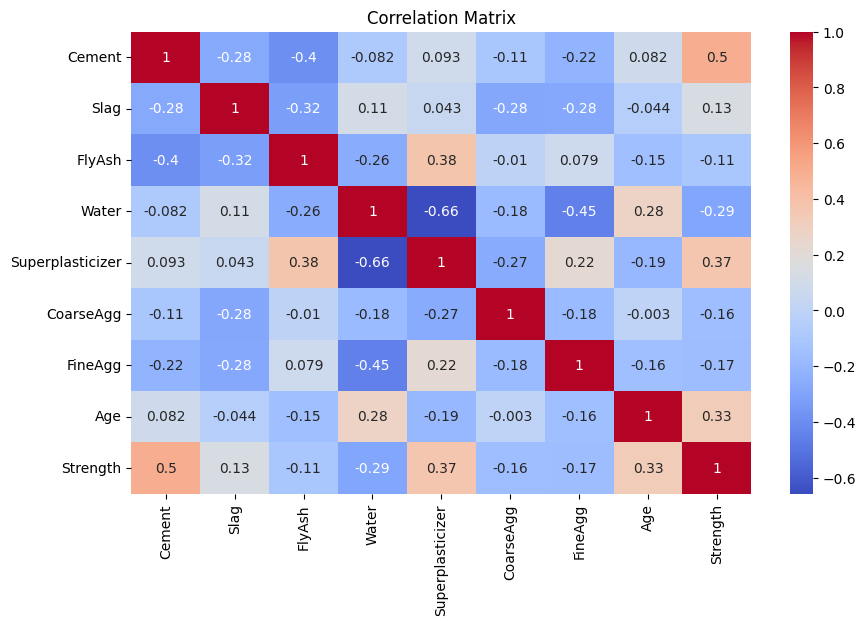

In [8]:

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

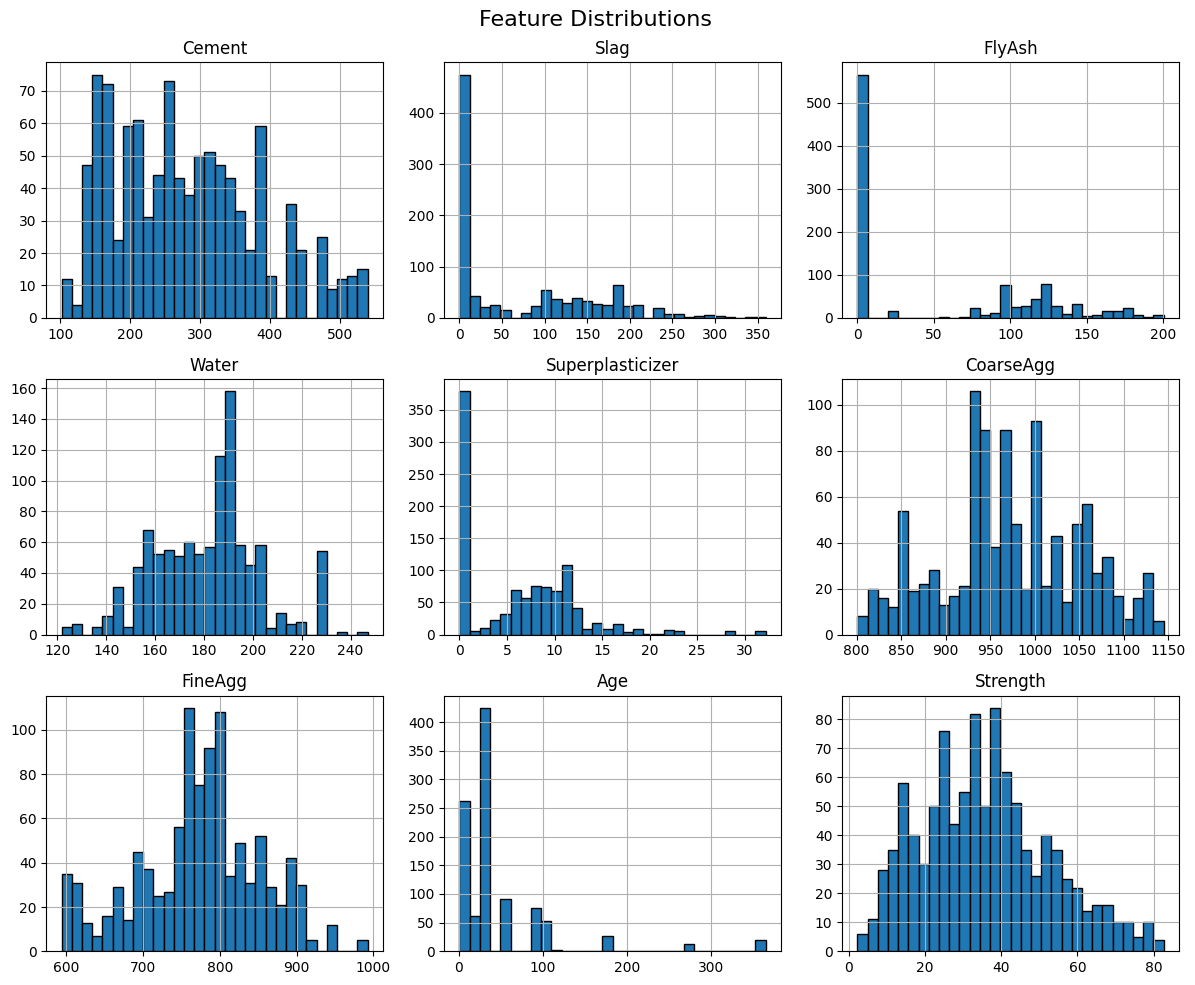

In [9]:
# Plot histograms for all features
df.hist(bins=30, figsize=(12, 10), edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()


# Feature Engineering
We’ll create three domain-relevant features:

Water_Cement_Ratio: Key in civil engineering (lower ratio = stronger concrete)

Cement_Age_Product: To capture how cement reacts over time

Aggregate_Ratio: Coarse vs fine aggregate balance





In [10]:
# Create new engineered features
df['Water_Cement_Ratio'] = df['Water'] / df['Cement']
df['Cement_Age_Product'] = df['Cement'] * df['Age']
df['Aggregate_Ratio'] = df['CoarseAgg'] / df['FineAgg']

# Confirm they're added
df[['Water_Cement_Ratio', 'Cement_Age_Product', 'Aggregate_Ratio']].head()


,Water_Cement_Ratio,Cement_Age_Product,Aggregate_Ratio
0,0.300000,15120.0,1.538462
1,0.300000,15120.0,1.560651
2,0.685714,89775.0,1.569024
3,0.685714,121362.5,1.569024
4,0.966767,71496.0,1.185221


In [11]:
# Include new features for correlation check
correlations = df.corr()['Strength'].sort_values(ascending=False)

# Display correlation with target
print("Feature Importance (Correlation with Strength):\n")
print(correlations)


Feature Importance (Correlation with Strength):

Strength              1.000000
Cement                0.497833
Cement_Age_Product    0.375884
Superplasticizer      0.366102
Age                   0.328877
Slag                  0.134824
Aggregate_Ratio       0.049037
FlyAsh               -0.105753
CoarseAgg            -0.164928
FineAgg              -0.167249
Water                -0.289613
Water_Cement_Ratio   -0.500700
Name: Strength, dtype: float64


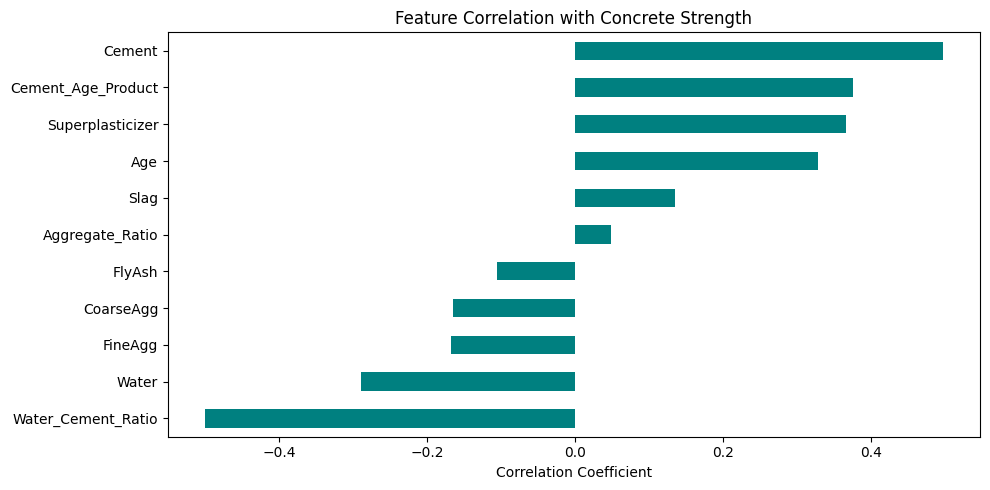

In [12]:
# Visualize top correlated features
plt.figure(figsize=(10, 5))
correlations.drop('Strength').plot(kind='barh', color='teal')
plt.title("Feature Correlation with Concrete Strength")
plt.xlabel("Correlation Coefficient")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


# Data Preprocessing

In [15]:
# Separate features (X) and target variable (y)
X = df.drop('Strength', axis=1)
y = df['Strength']

# First split: 70% train, 30% temp
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Second split: Split the temporary set into 50% validation and 50% test (15% each of the original data)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (721, 11), y_train shape: (721,)
X_val shape: (154, 11), y_val shape: (154,)
X_test shape: (155, 11), y_test shape: (155,)


# Train Baseline Regression Models

In [17]:
from sklearn.svm import SVR
# Instantiate models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Regression': SVR(),
    'Gradient Boosting': GradientBoostingRegressor()
}

# Train and evaluate models
results = {}
for name, model in models.items():
    try:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)

        mae = mean_absolute_error(y_val, y_pred)
        rmse = np.sqrt(mean_squared_error(y_val, y_pred))
        r2 = r2_score(y_val, y_pred)

        results[name] = {'model': model, 'mae': mae, 'rmse': rmse, 'r2': r2}
        print(f"{name}: MAE={mae:.4f}, RMSE={rmse:.4f}, R^2={r2:.4f}")

    except Exception as e:
        print(f"Error training {name}: {e}")
        results[name] = {'model': None, 'mae': None, 'rmse': None, 'r2': None}


Linear Regression: MAE=8.4077, RMSE=10.8329, R^2=0.5931
Random Forest: MAE=3.3510, RMSE=5.0939, R^2=0.9100
Support Vector Regression: MAE=10.1719, RMSE=12.9747, R^2=0.4163
Gradient Boosting: MAE=3.6357, RMSE=5.1349, R^2=0.9086


# Hyperparameter Tuning with GridSearchCV

## Random Forest Hyperparameter Tuning

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate GridSearchCV for Random Forest
rf_grid_search = GridSearchCV(RandomForestRegressor(random_state=42), rf_param_grid, scoring='neg_mean_squared_error', cv=5)
rf_grid_search.fit(X_train, y_train)

# Get the best Random Forest model and hyperparameters
best_rf_model = rf_grid_search.best_estimator_
best_rf_params = rf_grid_search.best_params_

print(f"Best Random Forest parameters: {best_rf_params}")

# Evaluate the best Random Forest model on the validation set
rf_val_pred = best_rf_model.predict(X_val)

rf_mae = mean_absolute_error(y_val, rf_val_pred)
rf_rmse = np.sqrt(mean_squared_error(y_val, rf_val_pred))
rf_r2 = r2_score(y_val, rf_val_pred)

print(f"Optimized Random Forest: MAE={rf_mae:.4f}, RMSE={rf_rmse:.4f}, R^2={rf_r2:.4f}")


Best Random Forest parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Optimized Random Forest: MAE=3.3677, RMSE=5.1571, R^2=0.9078


## Gradient Boosting Hyperparameter Tuning

In [20]:


# Define parameter grid for Gradient Boosting
gb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0]
}

# Instantiate GridSearchCV for Gradient Boosting
gb_grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42), gb_param_grid, scoring='neg_mean_squared_error', cv=5)
gb_grid_search.fit(X_train, y_train)

# Get the best Gradient Boosting model and hyperparameters
best_gb_model = gb_grid_search.best_estimator_
best_gb_params = gb_grid_search.best_params_

print(f"Best Gradient Boosting parameters: {best_gb_params}")

# Evaluate the best Gradient Boosting model on the validation set
gb_val_pred = best_gb_model.predict(X_val)

gb_mae = mean_absolute_error(y_val, gb_val_pred)
gb_rmse = np.sqrt(mean_squared_error(y_val, gb_val_pred))
gb_r2 = r2_score(y_val, gb_val_pred)

print(f"Optimized Gradient Boosting: MAE={gb_mae:.4f}, RMSE={gb_rmse:.4f}, R^2={gb_r2:.4f}")


Best Gradient Boosting parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Optimized Gradient Boosting: MAE=2.8992, RMSE=4.3070, R^2=0.9357


# Final Evaluation on Test Set
Now that we’ve selected the best model via validation, evaluate it on the test set to get an unbiased estimate of its performance.

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predict on the test set
rf_test_pred = best_rf_model.predict(X_test)
gb_test_pred = best_gb_model.predict(X_test)

# Calculate evaluation metrics for the test set
rf_test_mae = mean_absolute_error(y_test, rf_test_pred)
rf_test_rmse = np.sqrt(mean_squared_error(y_test, rf_test_pred))
rf_test_r2 = r2_score(y_test, rf_test_pred)

gb_test_mae = mean_absolute_error(y_test, gb_test_pred)
gb_test_rmse = np.sqrt(mean_squared_error(y_test, gb_test_pred))
gb_test_r2 = r2_score(y_test, gb_test_pred)

# Print the test set results
print("Test Set Performance:")
print(f"Optimized Random Forest: MAE={rf_test_mae:.4f}, RMSE={rf_test_rmse:.4f}, R^2={rf_test_r2:.4f}")
print(f"Optimized Gradient Boosting: MAE={gb_test_mae:.4f}, RMSE={gb_test_rmse:.4f}, R^2={gb_test_r2:.4f}")

Test Set Performance:
Optimized Random Forest: MAE=4.1288, RMSE=5.7115, R^2=0.8697
Optimized Gradient Boosting: MAE=3.6965, RMSE=4.8705, R^2=0.9052


In [22]:
# Print a comparative summary
print("\nModel Performance Comparison:")
print("-" * 30)
print("Metric\t\t| Random Forest (Val)\t| Random Forest (Test)\t| Gradient Boosting (Val)\t| Gradient Boosting (Test)")
print("-" * 30)
print(f"MAE\t\t| {rf_mae:.4f}\t\t| {rf_test_mae:.4f}\t\t| {gb_mae:.4f}\t\t| {gb_test_mae:.4f}")
print(f"RMSE\t\t| {rf_rmse:.4f}\t\t| {rf_test_rmse:.4f}\t\t| {gb_rmse:.4f}\t\t| {gb_test_rmse:.4f}")
print(f"R^2\t\t| {rf_r2:.4f}\t\t| {rf_test_r2:.4f}\t\t| {gb_r2:.4f}\t\t| {gb_test_r2:.4f}")
print("-" * 30)


Model Performance Comparison:
------------------------------
Metric		| Random Forest (Val)	| Random Forest (Test)	| Gradient Boosting (Val)	| Gradient Boosting (Test)
------------------------------
MAE		| 3.3677		| 4.1288		| 2.8992		| 3.6965
RMSE		| 5.1571		| 5.7115		| 4.3070		| 4.8705
R^2		| 0.9078		| 0.8697		| 0.9357		| 0.9052
------------------------------


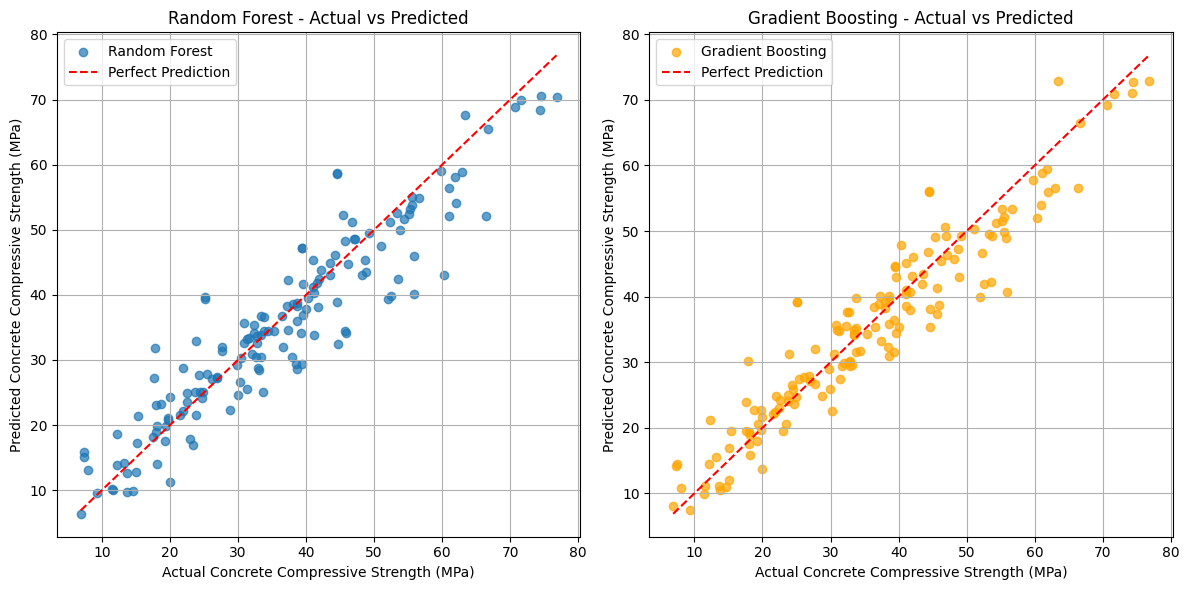

In [23]:
# Predict on the test set
rf_test_pred = best_rf_model.predict(X_test)
gb_test_pred = best_gb_model.predict(X_test)


# 1. Model Performance Visualization

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, rf_test_pred, label='Random Forest', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel("Actual Concrete Compressive Strength (MPa)")
plt.ylabel("Predicted Concrete Compressive Strength (MPa)")
plt.title("Random Forest - Actual vs Predicted")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(y_test, gb_test_pred, label='Gradient Boosting', alpha=0.7, color='orange')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel("Actual Concrete Compressive Strength (MPa)")
plt.ylabel("Predicted Concrete Compressive Strength (MPa)")
plt.title("Gradient Boosting - Actual vs Predicted")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

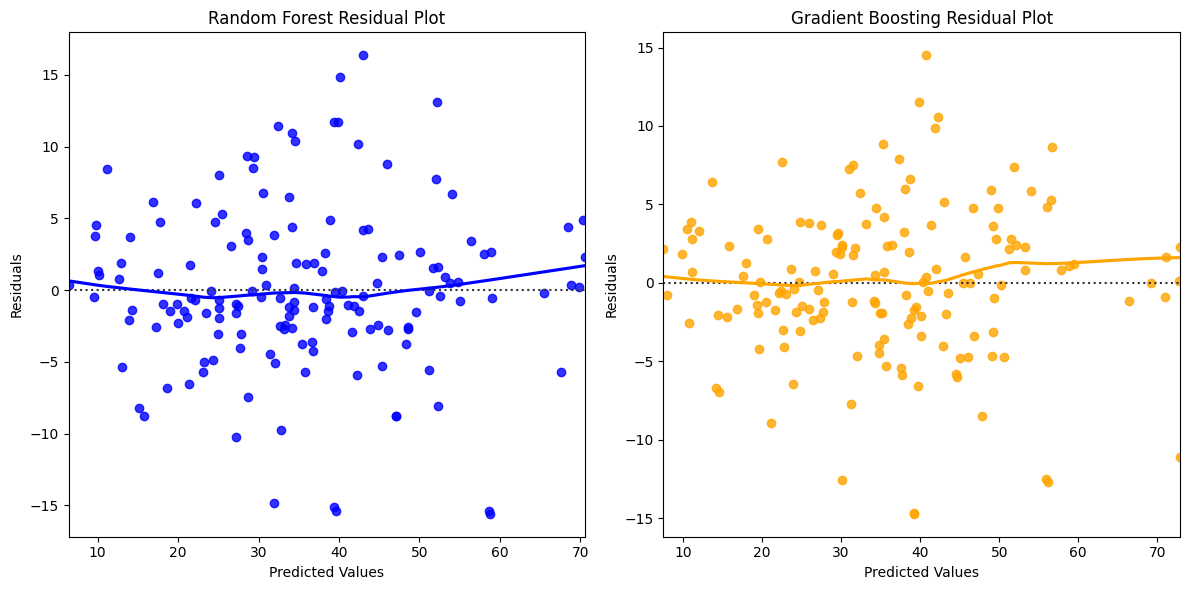

In [24]:
# Residual Plots
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
residuals_rf = y_test - rf_test_pred
sns.residplot(x=rf_test_pred, y=residuals_rf, lowess=True, color="blue")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title('Random Forest Residual Plot')

plt.subplot(1, 2, 2)
residuals_gb = y_test - gb_test_pred
sns.residplot(x=gb_test_pred, y=residuals_gb, lowess=True, color="orange")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title('Gradient Boosting Residual Plot')

plt.tight_layout()
plt.show()

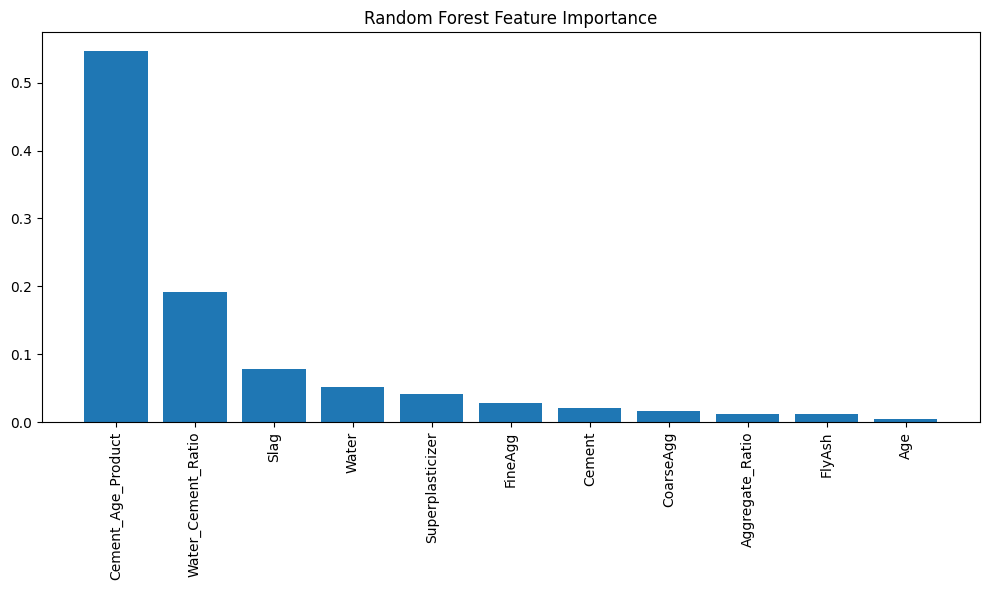

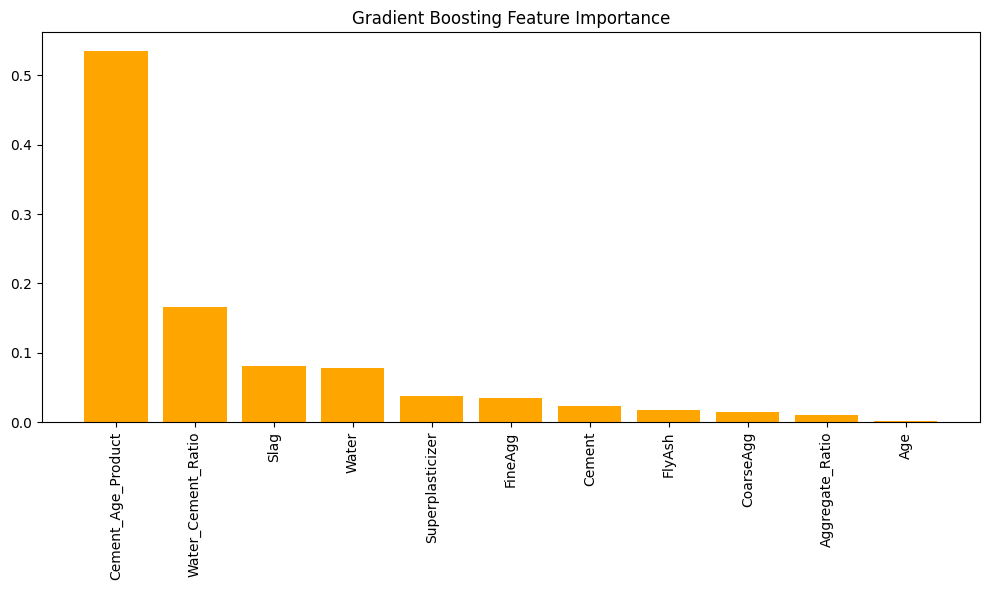

In [25]:
# 2. Feature Importance Visualization

plt.figure(figsize=(10, 6))

feature_importances_rf = best_rf_model.feature_importances_
feature_importances_gb = best_gb_model.feature_importances_

sorted_idx_rf = np.argsort(feature_importances_rf)[::-1]
sorted_idx_gb = np.argsort(feature_importances_gb)[::-1]

plt.bar(range(X_train.shape[1]), feature_importances_rf[sorted_idx_rf], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_idx_rf], rotation=90)
plt.title('Random Forest Feature Importance')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))

plt.bar(range(X_train.shape[1]), feature_importances_gb[sorted_idx_gb], align="center", color='orange')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_idx_gb], rotation=90)
plt.title('Gradient Boosting Feature Importance')
plt.tight_layout()
plt.show()
